In [1]:
# dimensionality reduction: motivation is that in a lots of data, some features dont add to the classification or regression 
# accuracy. hence can be discarded. Also some highly correlated features can be combined into mean, which will fasten the
# training process without losing accuracy 
# also: data visulization. gain intuition into the data with reduced dimensionality

In [2]:
# curse of dimensionlity: data in higher dimension are sparse if sampled randomly due to more freedom of dimensionality choice
# hence fitting high dimensionality data has the risk of overfitting without being able to generalize.
# solution: we can seek to increase the number of data to have better generlization. nevertheless the number of data points
# required to generalize in higher dimension is exponential to the number of dimension. Not feasible1

In [3]:
# solution: reduce dimensionality 
# two approaches: projection and manifold learning
# example for the first: 3D space data which can be projected onto a 2D space with a circle shape
# example for the second: swiss row which needs to be unrolled rather than projected onto any subspace, which causes overlapping data


In [4]:
# PCA can be used for data compression while controling the percentage
# of information lost (variance lost)
# reconstruction error is the mean squared distance between original 
# and compressed data

In [6]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [8]:
from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [19]:
d = np.argmax(cumsum>=0.95) +1

In [25]:
d

154

In [26]:
# now we know that the dimension that maintain 95% variance is 154
# dimension

In [28]:
# another way:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [33]:
X_reduced.shape

(52500, 154)

In [35]:
# now that the data is compressed to 154 dimensions
pca.n_components_

154

In [37]:
np.sum(pca.explained_variance_ratio_)

0.95043619857076345

In [38]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [39]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Text(0.5,1,'Compressed')

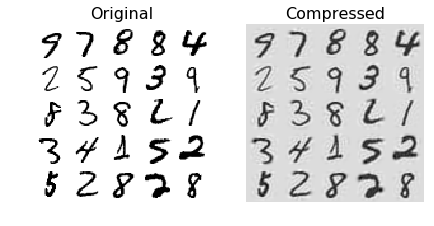

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [55]:
# tuning hyperparameters of the kernal PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
# pipeline can be an array of combination of tuples
clf = Pipeline(
[
    ("kpca", KernelPCA(n_components =2)),
    ('log_reg', LogisticRegression())
])

# param_grid can be an array of dictionaries
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel":['rbf', 'sigmoid']
}]

In [ ]:
# search for the best hyperparameter
grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X, y)